In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('diabetes.csv')

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_30880\2156374674.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [60]:
"parameters"

flex_vertical_layout = "scroll"

# Data Exploration

## Data Exploration

### What does the data look like

### We have 768 observation with 9 features

In [61]:
df.shape

(768, 9)

### All columns are int64 (whole numbers) except for BMI and DiabetesPedigreeFunction which are float64 (decimal numbers)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



### These are the first 5 rows, these are all numerical continue values.

In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### How are these columns measured
| Column | Measurement |
|:--------------|:--------------|
| Pregnancies: | Number of pregnancies |
| Glucose: | Plasma glucose concentration 2 hours in an oral glucose tolerance test |
| BloodPressure: | Diastolic blood pressure (mm Hg) |
| SKinTHickness: | Triceps skin fold thickness (mm) |
| Insulin: | 2-Hour serum insulin (mu U/ml) |
| BMI: | Body mass index (weight in kg/(height in m)^2) |
| DIabetesPedigreeFunction: | The diabetes pedigree function |
| Age: | Age (years) |
| Outcome: |0 means no diabetes, 1 means diabetes |

| Column 1 | Column 2 | Column 3 |
|----------|----------|----------|
| Value 1  | Value 2  | Value 3  |
| Value 4  | Value 5  | Value 6  |
| Value 7  | Value 8  | Value 9  |

### Outliers

### You can see that the max of Pregnancies, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age is much higher than the top 75%, this indicates that there are outliers.

In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Missing data


## At first it may look that there are no missing values.

#### The missing values in the columns seem to be zero for each column.

In [65]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### All the columns rows are non-null

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## When you look closer however you can see that there are zero's in columns that actually shouldn't be possible, these columns are Glucose, BloodPressure,SkinThickness, Insulin and BMI. Pregnancies, DiabetesPedigreeFunction and Age can be zero. These zero's are missing values.

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Unbalanced Data

### You can see skewed data in the following columns: Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction and Age

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

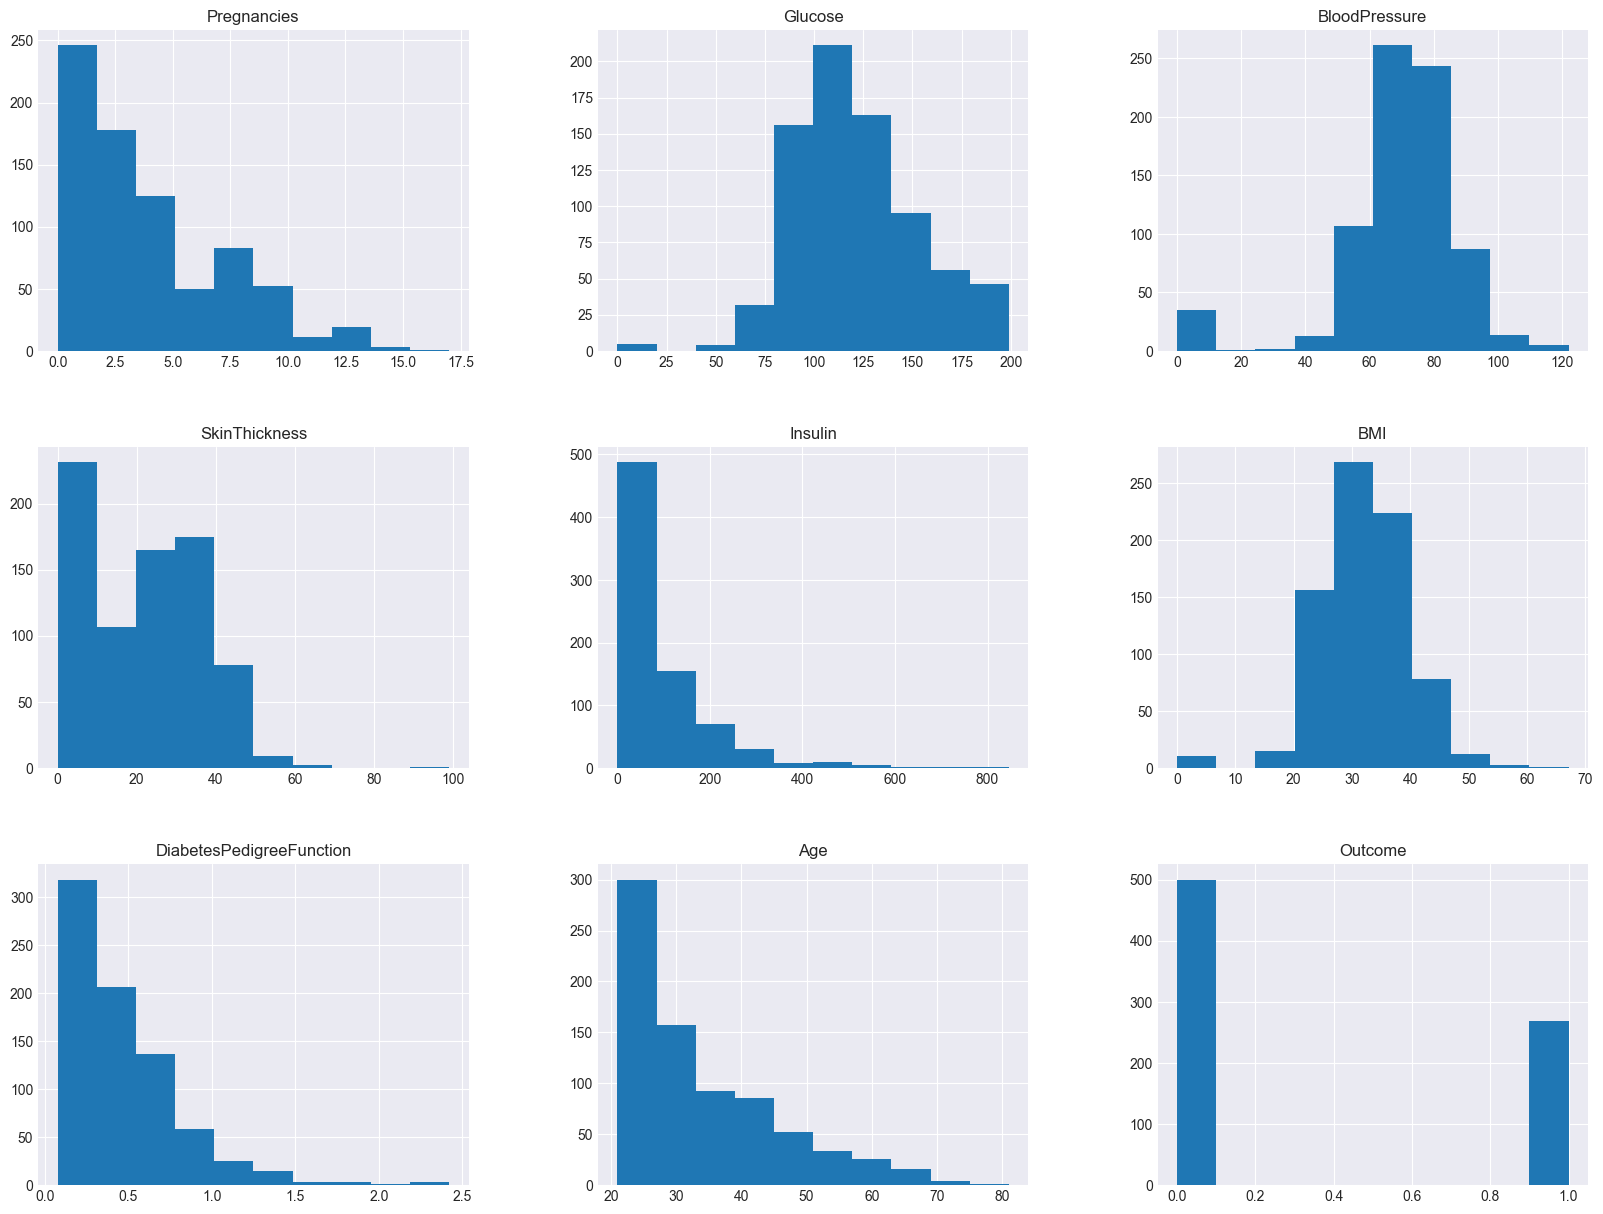

In [68]:
df.hist(figsize=(20,15))

### Correlations

### There are no strong correlations between columns, there are columns which have totally no correlation. These columns are Pregnancies and SkinThickness, Pregnancies and Insulin, SkinThickness and Age.

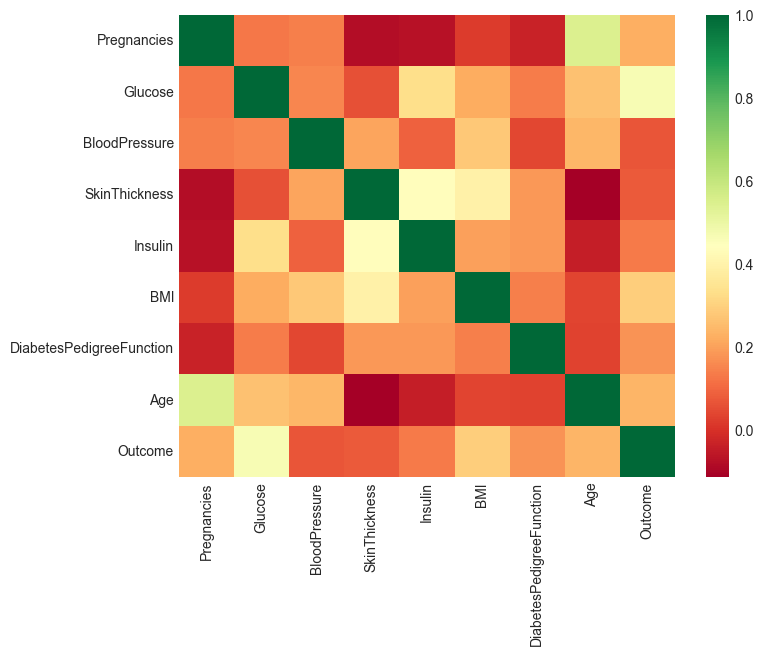

In [69]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, cmap='RdYlGn');

### Target Variable

### The target variable is called Outcome and is a representation of if someone has diabetes or not. 0 means that the person has no diabetes, 1 means that the person has diabetes. Of the 768 people there are 500 persons without diabetes and 268 persons with diabetes.

In [70]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Data Cleaning

## Data Cleaning

### Duplicates

### There where no duplicate observations, the shape remains the same.

In [71]:
df_no_dup = df.copy()
df_no_dup.drop_duplicates()

df_no_dup.shape

(768, 9)

### Missing Values

### Data before, you can see zero's in columns where its impossible to have zero's, this is missing data.

In [72]:
df_no_dup.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### First we replace the zero's in the columns where zero is impossible with Nan.

In [73]:
df_nan = df_no_dup.copy()
df_nan[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_nan[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_nan.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Then we fill the Nan values in with the median of each column.

In [74]:
df_imputed = df_nan.copy()

# import Imputer 
from sklearn.impute import SimpleImputer

# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
# strategy is median because mean results in values to high
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Train the imputor on the dataset
mean_imputer = mean_imputer.fit(df_imputed[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Apply the imputer to the dataset (This imputer can also be used on future datasets)
df_imputed[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = mean_imputer.transform(df_imputed[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values)
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


### Unbalanced Data

### There are some right-skewed columns, we fix this by doing a log transformation. The log transformed columns are Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction and Age, see the before and after

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

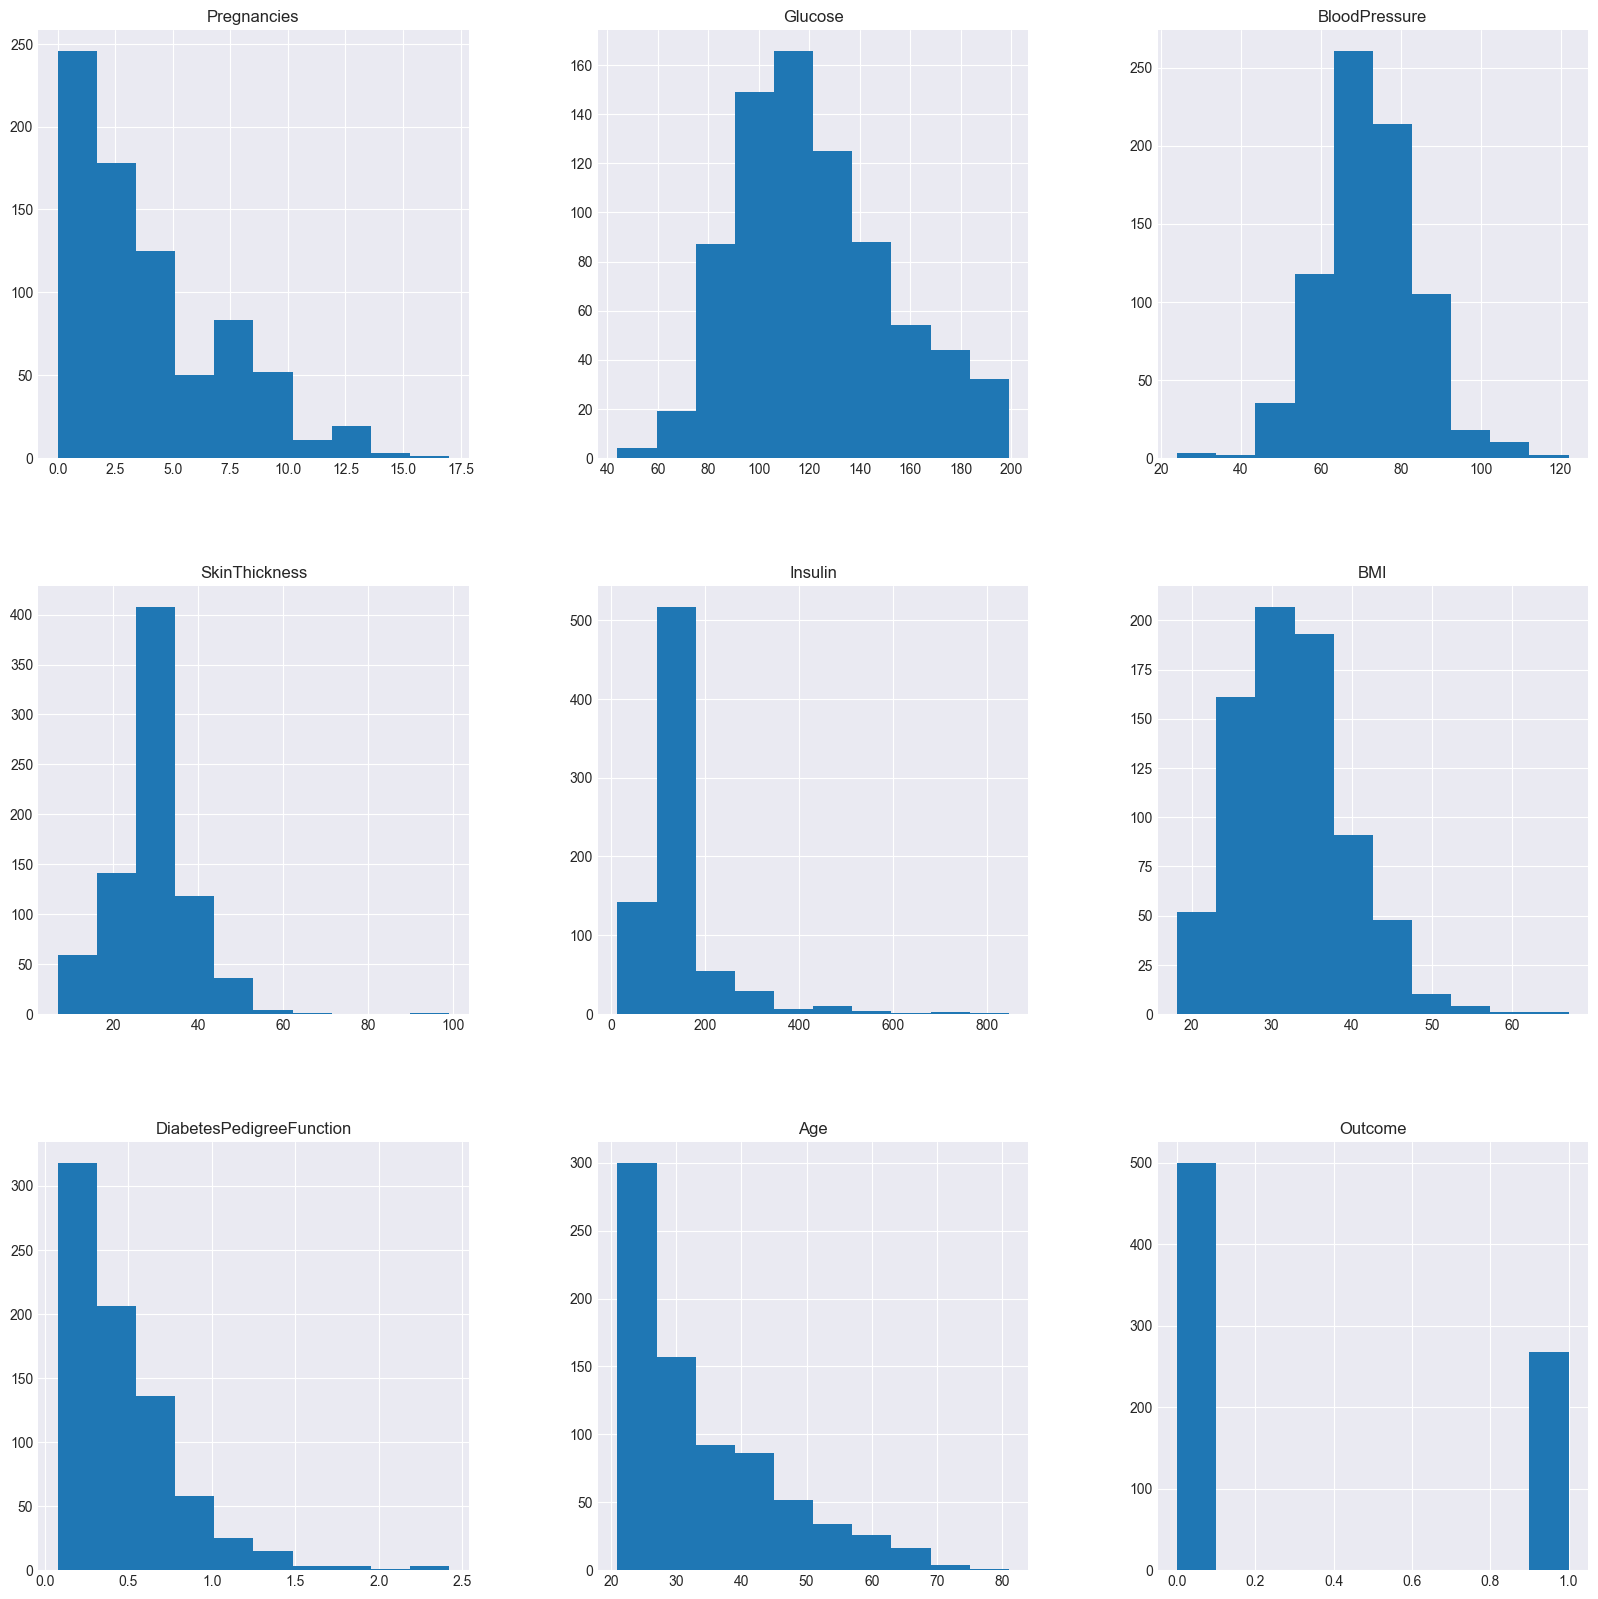

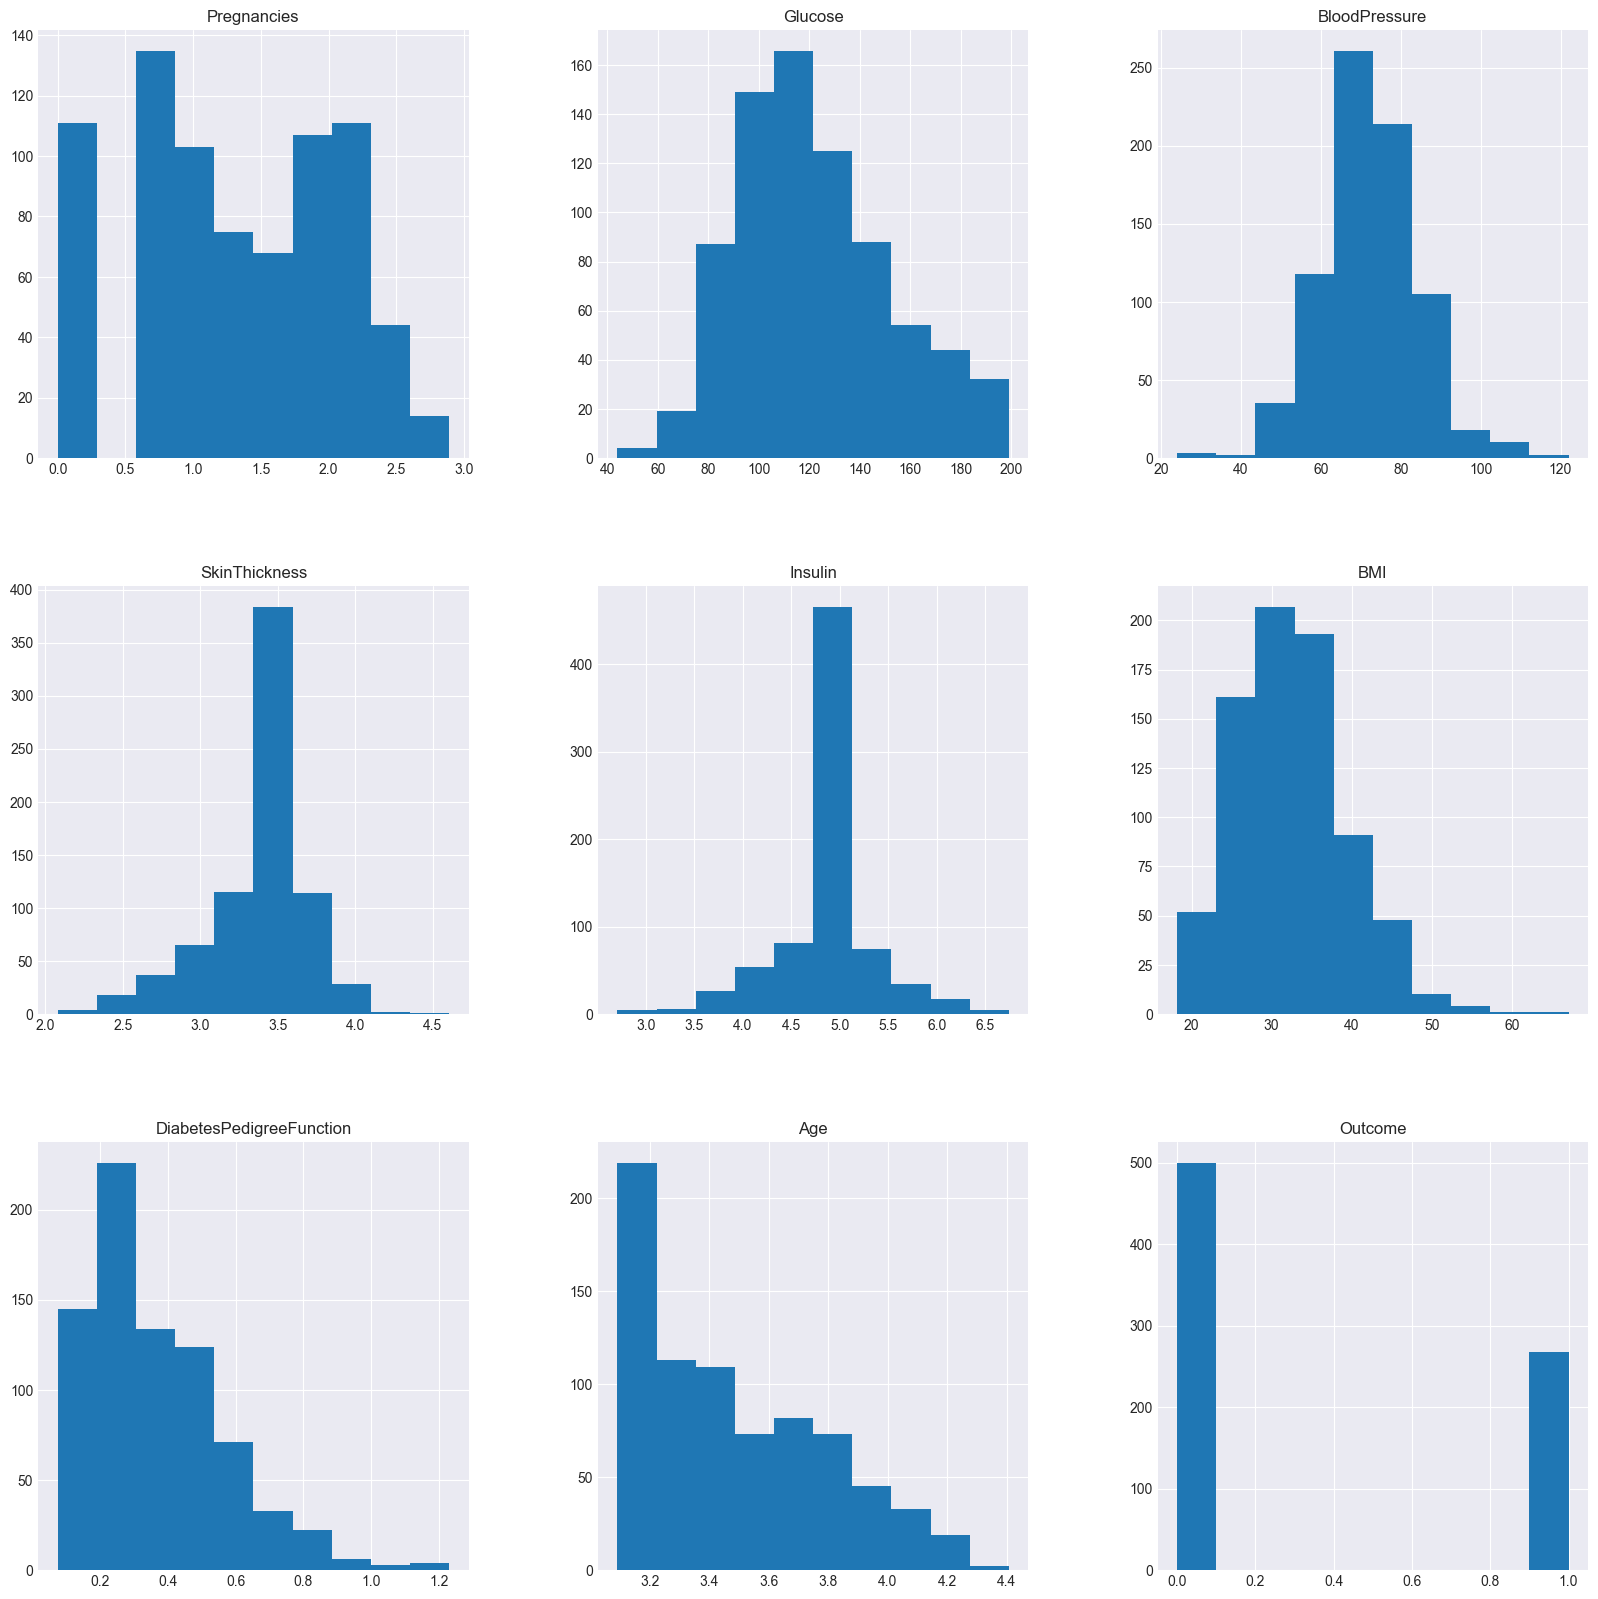

In [75]:
# the columns Pregnancies, DiabetesPedigreeFunction and Age are skewed so we log transform them
from scipy.stats import skew
cols = df_imputed.columns
df_imputed[cols].hist(figsize = (20,20))
df_not_skewed = df_imputed.copy()
logged_cols = []
for col in cols:
    skewed = skew(df_not_skewed[col].dropna().astype(float))
    if skewed > 0.75:
        df_not_skewed[col] = np.log1p(df_not_skewed[col])
        logged_cols.append(col)
df_not_skewed[cols].hist(figsize = (20,20))

# Data Training

## Data Training

### Logistic Regression

###

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Train Val Test Split
df_shuffle = df_not_skewed.sample(frac = 1, random_state=1234)
X = df_shuffle.drop(['Outcome'],axis=1)
y = df_shuffle['Outcome']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.2, random_state=1234)

# Standardize
num_feat = df_not_skewed.columns[0:8]
scaler = StandardScaler()
X_train_stand = X_train.copy()
X_trainval_stand = X_trainval.copy()
X_val_stand = X_val.copy()
X_test_stand = X_test.copy()

X_train_stand[num_feat] = scaler.fit_transform(X_train_stand[num_feat])
X_val_stand[num_feat] = scaler.transform(X_val_stand[num_feat])
X_trainval_stand[num_feat] = scaler.transform(X_trainval_stand[num_feat])
X_test_stand[num_feat] = scaler.transform(X_test_stand[num_feat])


### After Training a Logistic Regression Model we get a 0.86 AUC (Area Under the Curve)

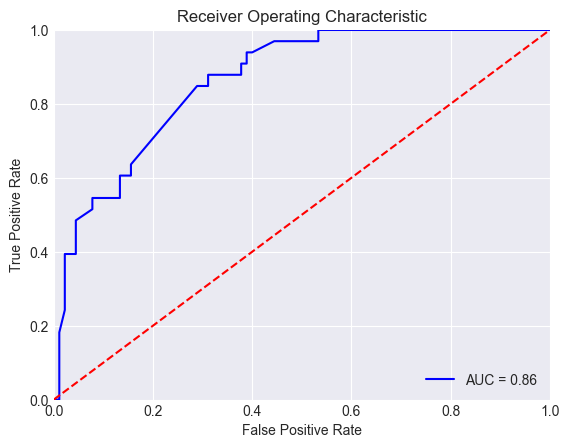

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import classification_report
logreg2 = LogisticRegression(C=10000, max_iter=1000) 
isotonic2 = CalibratedClassifierCV(logreg2, cv=3, method='isotonic')
isotonic2.fit(X_train_stand, y_train)


# The calibration plot
y_val_pred_prob_c2 = isotonic2.predict_proba(X_val_stand)

fop_c, mpv_c = calibration_curve(y_val,y_val_pred_prob_c2[:,1],n_bins=10)

# plt.plot(mpv_c,fop_c, marker='o', linewidth=1, label='calibrated')
# plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
# plt.legend()
# plt.show()

y_pred_c2 = isotonic2.predict(X_val_stand)
classification_report(y_val, y_pred_c2)

# print the ROC-curve
import sklearn.metrics as metrics
preds = y_val_pred_prob_c2[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Polynomial Regression

### After Training a Polynomial Regression Model we get a 0.87 AUC (Area Under the Curve)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


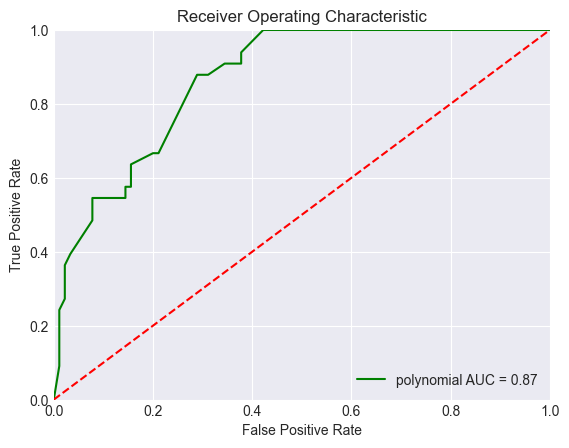

In [78]:
# Design the polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_stand)
X_trainval_poly = poly.transform(X_trainval_stand)
X_val_poly = poly.transform(X_val_stand)

# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

C = [round(x,5) for x in np.linspace(start = 0.0001, stop = 10, num = 1000)]
random_grid = {'C': C}
# The object to fit the model
logreg = LogisticRegression( max_iter=1000) 

# object for the randomised search
log_random = RandomizedSearchCV(estimator = logreg, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2,  n_jobs=-1, random_state=1234)

#Fitting model (model+ calibration)
log_random.fit(X_train_poly, y_train)

#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

prec_scorer = make_scorer(metrics.accuracy_score)
# other possibilities are metrics.recall_score, metrics.average_precision, ...

C = [x for x in np.linspace(start = 0.0001, stop = 1, num = 50)]

random_grid = {'C': C}

# The object to fit the model
logreg_balanced = LogisticRegression( max_iter=1000) 

# Object for the randomised search
log_grid = GridSearchCV(estimator = logreg_balanced, param_grid = random_grid,
                                scoring=prec_scorer  , cv = 3, verbose=2,  n_jobs=-1)
isotonic_log = CalibratedClassifierCV(log_grid, cv=3, method='isotonic')

# Fitting model (model+ calibration)
isotonic_log.fit(X_train_poly, y_train)

# Evaluation
isotonic_log.score(X_val_poly, y_val)

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_poly = isotonic_log.predict_proba(X_val_poly)[:,1]

fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)

roc_auc_p = metrics.auc(fpr_p, tpr_p)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K Neighbors Classifier

### After Training a K Neighbors Classifier Model we get a 0.81 AUC (Area Under the Curve)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


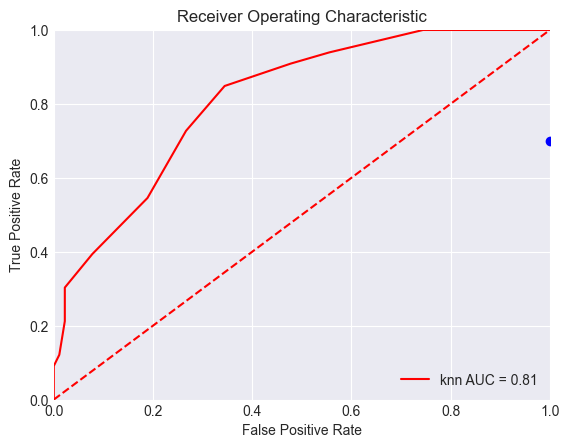

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = np.arange(1,30)
param_grid = {'n_neighbors': n_neighbors}
knn = KNeighborsClassifier( )
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, scoring=prec_scorer ,cv = 3,  verbose=2, n_jobs = -1)
grid_search.fit(X_train_stand, y_train)
grid_search.best_params_

out2 = pd.DataFrame(grid_search.cv_results_)
xlabel_names = ['n_neighbors']
plt.scatter(out2['param_n_neighbors'], out2['mean_test_score'], c='blue');

preds_knn = grid_search.predict_proba(X_val_stand)[:,1]

fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn)

roc_auc_k = metrics.auc(fpr_k, tpr_k)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

### After Training a Gradient Boosting Classifier Model we get a 0.86 AUC (Area Under the Curve)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits


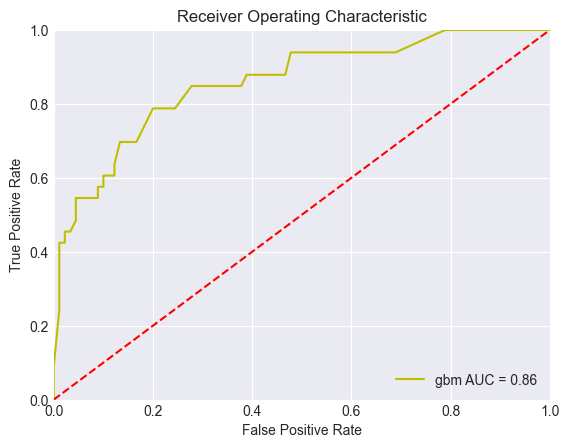

In [80]:
# #smote
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# over = SMOTE(sampling_strategy=0.8, random_state=1703)
# under = RandomUnderSampler(sampling_strategy=1)
# pipeline = Pipeline([('o', over), ('u', under)])

# X_train_smote, y_train_smote = pipeline.fit_resample(X_train_stand.copy(), y_train.copy())
# X_val_smote, y_val_smote = pipeline.fit_resample(X_trainval_stand.copy(), y_trainval.copy())
# np.bincount(y_val_smote)

# Randomized search
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 250, num = 50)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
learning_rate = [round(x,5) for x in np.linspace(start = 0.001, stop = 1.5, num = 50)]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train_stand.copy(), y_train.copy())
gbm_random.best_params_

# Grid search
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
# int(x) for x in np.linspace(150, 160, num = 3)
n_estimators = [170,188,136]
# x for x in np.linspace(0.1, 0.2, num = 3)
learning_rate = [0.82698,0.42929,0.94935]
max_features = ['sqrt']
max_depth = [6,5,1]
min_samples_split = [10,5,2]
min_samples_leaf = [3,7,2]
                                            
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gbm = GradientBoostingClassifier()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = random_grid,  cv = 3, verbose=2,  n_jobs = -1)

isotonic_gbm = CalibratedClassifierCV(gbm_grid, cv=3, method='isotonic')
isotonic_gbm.fit(X_train_stand.copy(), y_train.copy())

preds_gbm = isotonic_gbm.predict_proba(X_val_stand)[:,1]

fpr_g, tpr_g, threshold = metrics.roc_curve(y_val, preds_gbm)

roc_auc_g = metrics.auc(fpr_g, tpr_g)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr_g, tpr_g, 'y', label = 'gbm AUC = %0.2f' % roc_auc_g)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Retrain Best Model

### You can see that Polynomial Regression is the best Model but Logistic Regression is not much worse and less intensive, we will now retrain that model on the whole dataset.

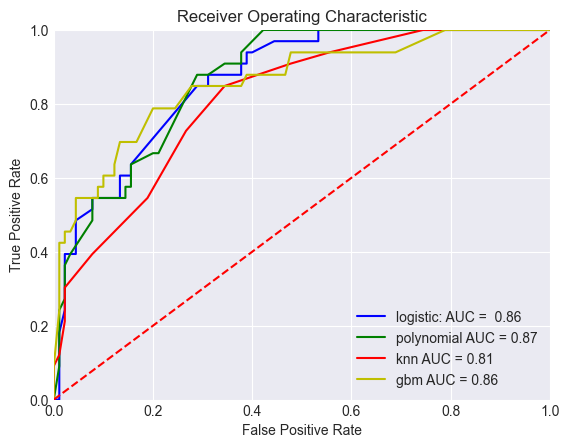

In [81]:
# preds_svm = isotonic_svm.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn)
fpr_g, tpr_g, threshold = metrics.roc_curve(y_val, preds_gbm)
# fpr_s, tpr_s, threshold = metrics.roc_curve(y_val, preds_svm)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)
roc_auc_g = metrics.auc(fpr_g, tpr_g)
# roc_auc_s = metrics.auc(fpr_s, tpr_s)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)
plt.plot(fpr_g, tpr_g, 'y', label = 'gbm AUC = %0.2f' % roc_auc_g)
# plt.plot(fpr_s, tpr_s, 'grey', label = 'svm AUC = %0.2f' % roc_auc_s)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### We have a final AUC (Area Under the Curve) of 82

In [100]:
#train best model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
final_logreg = LogisticRegression(C=10000, max_iter=1000) 
final_isotonic = CalibratedClassifierCV(final_logreg, cv=3, method='isotonic')
final_isotonic.fit(X_trainval_stand, y_trainval)
#results
import sklearn.metrics as metrics
final_y_test_pred_prob = final_isotonic.predict_proba(X_test_stand)
final_fpr, final_tpr, final_threshold = metrics.roc_curve(y_test, final_y_test_pred_prob[:,1])
final_roc_auc = metrics.auc(final_fpr, final_tpr)

# Test it out

## See if you have Diabetes

### See if you have Diabetes

In [101]:
from ipywidgets import Label, FloatText, VBox, HBox, Layout, Button
import pandas as pd
import numpy as np
def on_button_clicked(button):
    input_data = {
        'Pregnancies': pregnancies.value, 
        'Glucose': glucose.value, 
        'BloodPressure': blood_pressure.value,
        'SkinThickness':  skin_thickness.value, 
        'Insulin': insulin.value, 
        'BMI': bmi.value,
        'DiabetesPedigreeFunction': diabetes_pedigree_function.value,
        'Age': age.value
    }
    # Convert the dictionary to a Pandas DataFrame
    input_df = pd.DataFrame.from_dict([input_data])
    # Reorder the columns to match the order of the input features in your trained model
    input_df = input_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
    #convert missing values to nan
    input_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = input_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
    #use imputer
    input_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = mean_imputer.transform(input_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values)
    #log the skewed columns
    for col in logged_cols:
        input_df[col] = np.log1p(input_df[col])
    #use scaler
    input_df[num_feat] = scaler.transform(input_df[num_feat])
    #use best model
    result = final_isotonic.predict_proba(input_df)
    result = round(result[0][1] * 100,2) 
    values_label.value = 'You are ' + str(result) + '% ' + 'likely to have diabetes'
pregnancies = FloatText(description='Pregnancies:')
glucose = FloatText(description='Glucose:')
blood_pressure = FloatText(description='BloodPressure:')
skin_thickness = FloatText(description='SkinThickness:')
insulin = FloatText(description='Insulin:')
bmi = FloatText(description='BMI:')
diabetes_pedigree_function = FloatText(description='DiabetesPedigreeFunction:')
age = FloatText(description='Age:')
button = Button(description='Submit')
button.on_click(on_button_clicked)
values_label = Label()

for w in [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age, values_label]:
    w.layout.width = 'auto'
    w.layout.margin = 'auto'

button.layout.margin = 'auto'
button.layout.width = '10%'

# set color scheme
style = {'description_width': 'initial',
         'font_weight': 'bold',
         'width': '100px',
         'background-color': '#F0F0F0'}
pregnancies.style = style
glucose.style = style
blood_pressure.style = style
skin_thickness.style = style
insulin.style = style
bmi.style = style
diabetes_pedigree_function.style = style
age.style = style
button.style.button_color = '#3CB371'

# arrange fields in two rows with four fields each
row1 = HBox([pregnancies, glucose, blood_pressure, skin_thickness], layout=Layout(margin='100px 0 0 0'))
row2 = HBox([insulin, bmi, diabetes_pedigree_function, age], layout=Layout(margin='100px 0 0 0'))
row3 = HBox([button], layout=Layout(margin='100px 0 0 0'))
fields = VBox([row1, row2, row3, values_label], layout=Layout(overflow='hidden'))

# display the fields
fields